# 导入所必需的包

In [32]:
import qiime2 as q2
from deepphylo.rpca import rclr,rpca_table
from deepphylo.mystem_rpca import import_and_process_data, Phylo_RPCA, RPCA_PCA
from deepphylo.plot import plot_2d
import pandas as pd
%matplotlib inline

# 配置路径

In [9]:
table_path = 'data_phyloRPCA/urbmerged.biom'
metadata_path = 'data_phyloRPCA/10333_20190808-130957.txt'
tree_path = 'data_phyloRPCA/tree.qza'
taxonomy = q2.Artifact.load('data_phyloRPCA/taxonomy.qza')    

# 预处理部分得到table、metadata和进化树的信息

In [10]:
table, bt, metadata, tree = import_and_process_data(table_path, metadata_path, tree_path)

In [33]:
print(table.view(pd.DataFrame))

                           TACGTAGGTGGCAAGCGTTATCCGGAATTATTGGGCGTAAAGCGCGCGTAGGCGGTTTCTTAAGTCTGATGTGAAAGCCCACGGCTCAACCGTGGAGGGT  \
10333.Manaus.3346.1313696                                               34.0                                                      
10333.Manaus.3546.1313272                                              142.0                                                      
10333.Manaus.3708.1313460                                                0.0                                                      
10333.Manaus.3318.1313403                                                0.0                                                      
10333.Manaus.3372.1313934                                              367.0                                                      
...                                                                      ...                                                      
10333.Iqu.1038.huma                                                    219.0       

In [11]:
table_matrix = bt.to_dataframe().T
table_matrix_rclr = rclr(table_matrix)

# 基于丰度的RPCA

In [12]:
from deepphylo.mystem_rpca import RPCA_with_abundance
table_matrix_rclr, df_table_abundance_rclr, sample_loading_abundance_3d, colors = RPCA_with_abundance(bt,table_matrix_rclr)

In [25]:
sample_loading_abundance_3d

,PC1,PC2,PC3
10333.Manaus.3346.1313696,-0.062700,0.032890,-0.095675
10333.Manaus.3546.1313272,-0.088815,0.020992,0.001975
10333.Manaus.3708.1313460,-0.088330,-0.158770,-0.111032
10333.Manaus.3318.1313403,-0.090491,-0.019124,-0.080730
10333.Manaus.3372.1313934,-0.051201,0.064899,-0.157518
...,...,...,...
10333.Iqu.1038.huma,0.002337,-0.030238,0.077053
10333.Iqu.1127.huma,0.041955,0.133582,0.047127
10333.Iqu.1086.huma,-0.044493,-0.046280,0.106294
10333.Man.1810.huma,-0.053563,0.047922,-0.088778


# RPCA和进化树

In [15]:
tntree, sample_loading_phyloRPCA_3d = Phylo_RPCA(tree,bt)

In [34]:
sample_loading_phyloRPCA_3d

,PC1,PC2,PC3
10333.Manaus.3346.1313696,-0.098832,0.088878,0.039366
10333.Manaus.3546.1313272,-0.062573,0.008617,-0.059647
10333.Manaus.3708.1313460,-0.118512,-0.000342,-0.049709
10333.Manaus.3318.1313403,-0.109181,0.078134,-0.070047
10333.Manaus.3372.1313934,-0.102422,0.144802,0.061849
...,...,...,...
10333.Iqu.1038.huma,0.039547,-0.115407,0.098577
10333.Iqu.1127.huma,0.077447,-0.058108,0.158215
10333.Iqu.1086.huma,-0.003302,-0.115030,0.019829
10333.Man.1810.huma,-0.049763,0.066707,0.041066


# RPCA+PCA降维融合

In [17]:
sample_evol_feature_20d_normalized,sample_merged_feature_2d = RPCA_PCA(bt, tntree, table_matrix_rclr,df_table_abundance_rclr)

In [35]:
sample_merged_feature_2d

array([[-0.19832248, -1.41032338],
       [-0.60976928, -1.50453566],
       [-0.22528164, -1.49803023],
       [-0.53192393, -1.881012  ],
       [ 0.05080826, -1.63143944],
       [-0.99950484,  0.85677333],
       [-0.43542752, -0.70770562],
       [-0.52560275, -0.57305223],
       [-0.68925886, -1.04667412],
       [ 0.11181703, -0.91803382],
       [-0.80630852, -2.07287589],
       [-0.48205613, -1.1342428 ],
       [-0.18483369, -1.1119033 ],
       [-1.1434637 , -1.35905375],
       [-0.85929933, -1.66826488],
       [-0.31626871, -1.30429848],
       [ 0.36318916, -0.36718728],
       [-0.52863735, -1.49284719],
       [-0.45705473, -1.78291103],
       [-1.5508368 , -1.80330833],
       [-0.65845054, -1.9860035 ],
       [-0.92090924, -1.85554231],
       [-1.52771882, -0.69429855],
       [-0.82660999, -1.04530867],
       [-0.85683722,  0.81474967],
       [-0.24246839, -1.81520071],
       [-1.97794876,  0.32572015],
       [-0.42774824, -1.32174001],
       [-0.96902605,

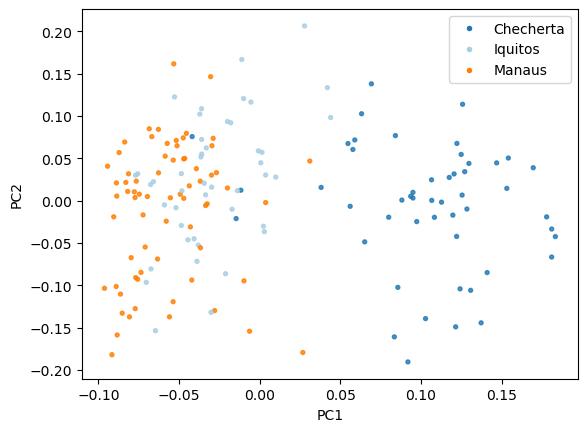

In [24]:
plot_2d(sample_loading_abundance_3d,colors)

/home/syl/DeepPhylo/deepphylo/plot.py:113: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


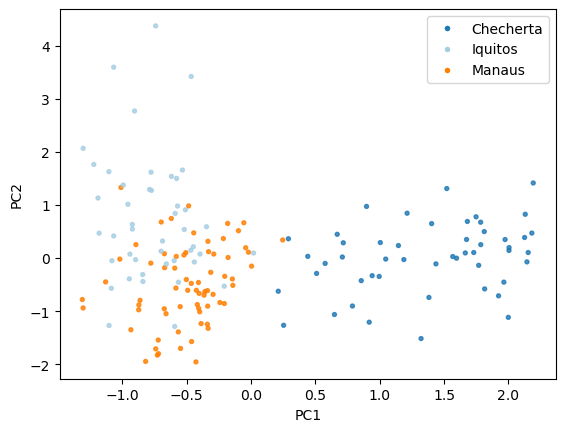

In [22]:
plot_2d(sample_evol_feature_20d_normalized,colors)

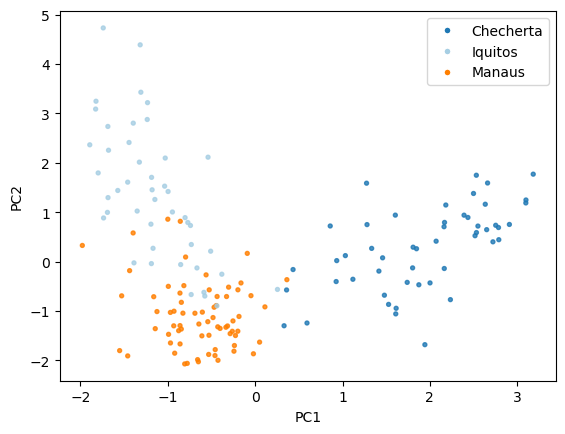

In [23]:
plot_2d(sample_merged_feature_2d,colors)

In [ ]:
table_path = 'data_phyloRPCA/urbmerged.biom'
metadata_path = 'data_phyloRPCA/10333_20190808-130957.txt'
tree_path = 'data_phyloRPCA/tree.qza'
taxonomy = q2.Artifact.load('data_phyloRPCA/taxonomy.qza')    
table, bt, metadata, tree = import_and_process_data(table_path, metadata_path, tree_path)
table_matrix_rclr, df_table_abundance_rclr, sample_loading_abundance_3d, colors = RPCA_with_abundance(bt)
tntree, sample_loading_phyloRPCA_3d = Phylo_RPCA(tree,bt)
sample_evol_feature_20d_normalized,sample_merged_feature_2d = RPCA_PCA(bt, tntree, table_matrix_rclr,df_table_abundance_rclr)
plot_2d(sample_loading_abundance_3d,colors)
plt.savefig('plot1.png')
plot_2d(sample_evol_feature_20d_normalized,colors)
plt.savefig('plot2.png')
plot_2d(sample_merged_feature_2d,colors)
plt.savefig('plot3.png')